In [84]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


In [85]:
test= pd.read_csv('SalaryData_Test.csv')
train= pd.read_csv('SalaryData_Train.csv')

# EDA

### Checking for null values in both the datasets

In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [88]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [89]:
train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


## Checking for Categorical values

In [90]:

categorical = [var for var in train if train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


##### Checking for Null values

In [91]:
train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [92]:
test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

### Checking The number of labels

In [93]:
for var in categorical:
    
    print(var, ' contains ', len(train[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [94]:
for var in categorical:
    
    print(var, ' contains ', len(test[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


### Applying Encoding to both independent and target variables

In [95]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
import category_encoders as ce
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [97]:
x_train_1= train[['age','workclass','education','educationno','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native']]
y_train= train['Salary']
x_test_1= test[['age','workclass','education','educationno','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native']]
y_test = test['Salary']

In [98]:
encoder= ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])
x_train_1=encoder.fit_transform(x_train_1)
x_test_1= encoder.fit_transform(x_test_1)

In [99]:
x_train_1

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,educationno,maritalstatus_1,maritalstatus_2,maritalstatus_3,maritalstatus_4,maritalstatus_5,maritalstatus_6,maritalstatus_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,occupation_14,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6,race_1,race_2,race_3,race_4,race_5,sex_1,sex_2,capitalgain,capitalloss,hoursperweek,native_1,native_2,native_3,native_4,native_5,native_6,native_7,native_8,native_9,native_10,native_11,native_12,native_13,native_14,native_15,native_16,native_17,native_18,native_19,native_20,native_21,native_22,native_23,native_24,native_25,native_26,native_27,native_28,native_29,native_30,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,39,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,2174,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,38,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,53,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,28,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30157,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30158,58,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30159,22,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
x_test_1

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,educationno,maritalstatus_1,maritalstatus_2,maritalstatus_3,maritalstatus_4,maritalstatus_5,maritalstatus_6,maritalstatus_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,occupation_14,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_6,race_1,race_2,race_3,race_4,race_5,sex_1,sex_2,capitalgain,capitalloss,hoursperweek,native_1,native_2,native_3,native_4,native_5,native_6,native_7,native_8,native_9,native_10,native_11,native_12,native_13,native_14,native_15,native_16,native_17,native_18,native_19,native_20,native_21,native_22,native_23,native_24,native_25,native_26,native_27,native_28,native_29,native_30,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,25,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,38,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,44,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,10,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,7688,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,34,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,13,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15056,39,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,13,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15057,38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,13,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15058,44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,5455,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)

In [102]:
y_test=le.fit_transform(y_test)

## Normalising Data

In [103]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_train=scale.fit_transform(x_train_1)
x_test=scale.fit_transform(x_test_1)

In [104]:
x_train

array([[0.30136986, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45205479, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28767123, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.56164384, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06849315, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47945205, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [105]:
x_test

array([[0.10958904, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28767123, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15068493, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.28767123, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.36986301, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24657534, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Applying Naive Bayes
### Applying both Multinominal and Gaussian 

In [106]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import classification_report,roc_curve,roc_auc_score

In [107]:
clf= MultinomialNB()
naive_bayes=clf.fit(x_train,y_train)

In [108]:
clf_1= GaussianNB()
naive_bayes_1=clf_1.fit(x_train,y_train)

## Predicting Values

### For Multinomial 

In [109]:
y_predict= clf.predict(x_test)
result=pd.DataFrame()
result['Expected value']=y_test
result['Predicted value']=y_predict
result

,Expected value,Predicted value
0,0,0
1,0,1
2,1,0
3,1,1
4,0,0
...,...,...
15055,0,0
15056,0,0
15057,0,0
15058,0,0


### For Gaussian 

In [110]:
y_predict_1= clf_1.predict(x_test)
result_1=pd.DataFrame()
result_1['Expected value']=y_test
result_1['Predicted value']=y_predict_1
result_1

,Expected value,Predicted value
0,0,1
1,0,1
2,1,0
3,1,1
4,0,0
...,...,...
15055,0,0
15056,0,0
15057,0,0
15058,0,0


#### Model Evaluation for Multinomial

In [111]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82     11360
           1       0.42      0.37      0.39      3700

    accuracy                           0.72     15060
   macro avg       0.61      0.60      0.60     15060
weighted avg       0.71      0.72      0.71     15060



In [112]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [113]:
cm_1 = confusion_matrix(y_test, y_predict)
cm_matrix_1 = pd.DataFrame(data=cm_1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

<Axes: >

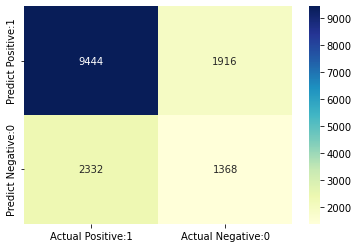

In [114]:
sns.heatmap(cm_matrix_1, annot=True, fmt='d', cmap='YlGnBu')

In [134]:
roc_auc_score(y_test,y_predict)

0.6005338789493719

Text(0, 0.5, 'True Positive Rate')

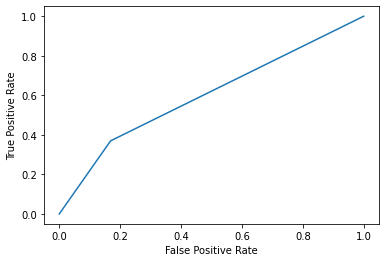

In [133]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


#### Model evaluation for Gaussian

In [116]:
print(classification_report(y_test, y_predict_1))

              precision    recall  f1-score   support

           0       0.79      0.48      0.59     11360
           1       0.27      0.61      0.38      3700

    accuracy                           0.51     15060
   macro avg       0.53      0.54      0.49     15060
weighted avg       0.66      0.51      0.54     15060



In [117]:
cm_2= confusion_matrix(y_test,y_predict_1)

In [118]:

cm_matrix_2 = pd.DataFrame(data=cm_2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

<Axes: >

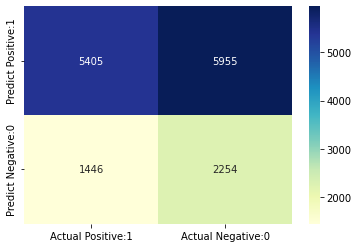

In [119]:
sns.heatmap(cm_matrix_2, annot=True, fmt='d', cmap='YlGnBu')

Text(0, 0.5, 'True Positive Rate')

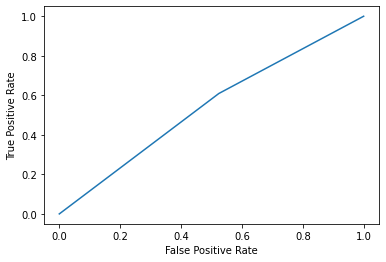

In [135]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [136]:
roc_auc_score(y_test,y_predict_1)

0.542490721355158

### Conclusion 
* If we observe both the models
  1. Multinomial
  2. Gaussian 
* we see that they have different accuracy and learning rate 
* For multinomial:
  1. Accuracy- 72%
  2. F1 Scores- 0.82,0.39
  3. AUC-ROC- 0.6
  4. Also if we observe the confusion matrix the pression for both the slaray types that is above 50k or below 50k is 42% and 82% respectivly 
  5. Fpr- 0= 0.2 and for 1= 0.58  
* For Gaussian:
  1. Accuracy- 51%
  2. F1 Scores- 0.59,0.38
  3. AUC-ROC- 0.54
  4. Also if we observe the confusion matrix the pression for both the slaray types that is above 50k or below 50k is 27% and 79% respectivly 
  5. Fpr- 0= 0.21 and for 1= 0.73
* Looking at the above value it is clear that Multinomial model is better becuase Gausian model is having less precision(Predicting incorrect values of salaray). Plus, its AUC ROC curve value is also less as compared to multinomial  